<a href="https://colab.research.google.com/github/Nidhinbc97/ML-AI/blob/main/ML_AI_Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/content/credit_card_default.csv')

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.shape

(30000, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_1                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

Droping Column

In [8]:
data.drop(['ID'],axis = 1, inplace = True)

In [9]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.553667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.518326,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


CHECKING OUTLIERS

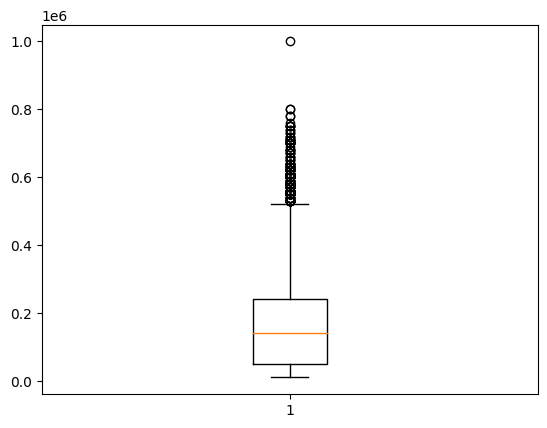

In [10]:
plt.boxplot(data['LIMIT_BAL'])
plt.show()

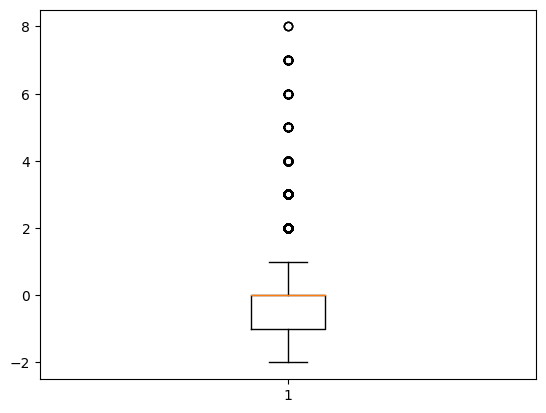

In [11]:
plt.boxplot(data['PAY_3'])
plt.show()

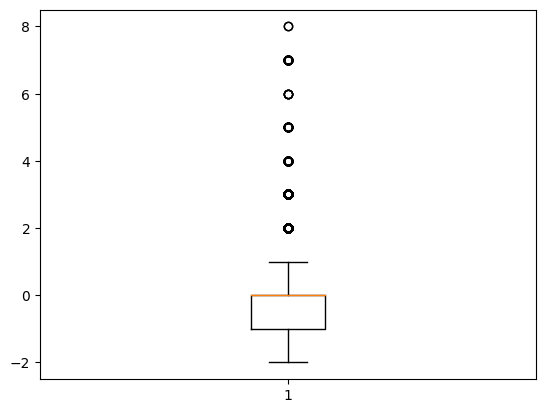

In [12]:
plt.boxplot(data['PAY_4'])
plt.show()

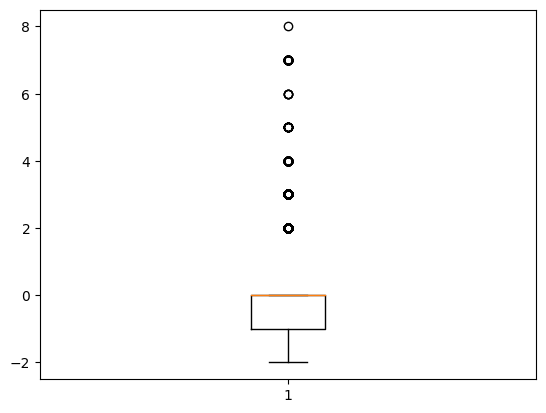

In [13]:
plt.boxplot(data['PAY_5'])
plt.show()

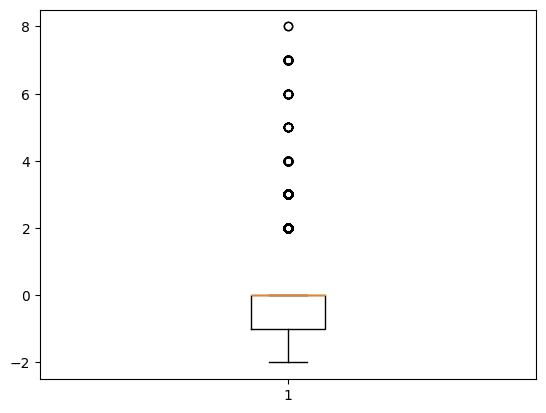

In [14]:
plt.boxplot(data['PAY_6'])
plt.show()

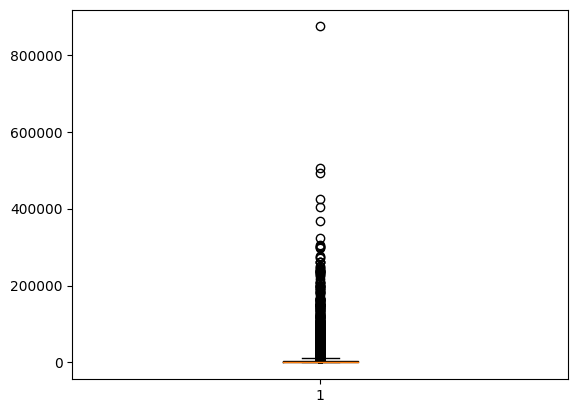

In [15]:
plt.boxplot(data['PAY_AMT1'])
plt.show()

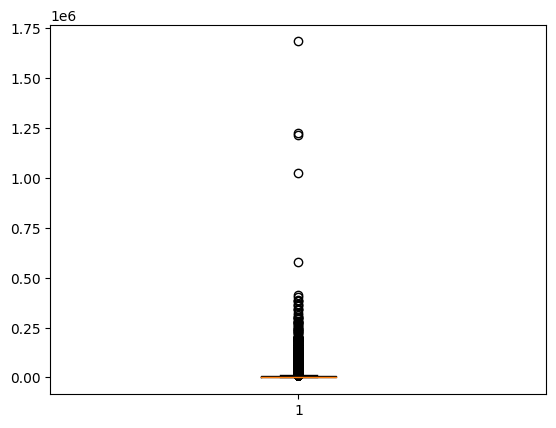

In [16]:
plt.boxplot(data['PAY_AMT2'])
plt.show()

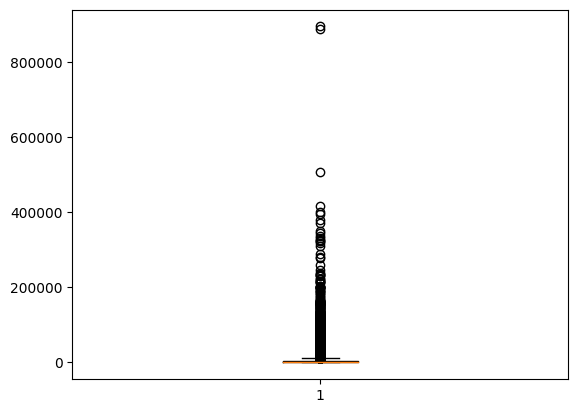

In [17]:
plt.boxplot(data['PAY_AMT3'])
plt.show()

In [18]:
req_col = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

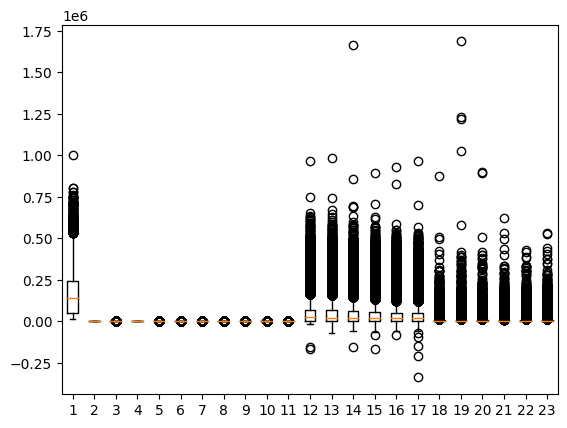

In [19]:
plt.boxplot(data[req_col])
plt.show()

In [20]:
def apply_limit_imputer(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    def limit_imputer(value):
        if value > upper_limit:
            return upper_limit
        elif value < lower_limit:
            return lower_limit
        else:
            return value


    df[column_name] = df[column_name].apply(limit_imputer)

In [21]:
apply_limit_imputer(data, 'LIMIT_BAL')
apply_limit_imputer(data, 'EDUCATION')
apply_limit_imputer(data, 'AGE')
apply_limit_imputer(data, 'PAY_1')
apply_limit_imputer(data, 'PAY_2')
apply_limit_imputer(data, 'PAY_3')
apply_limit_imputer(data, 'PAY_4')
apply_limit_imputer(data, 'PAY_5')
apply_limit_imputer(data, 'PAY_6')
apply_limit_imputer(data, 'BILL_AMT1')
apply_limit_imputer(data, 'BILL_AMT2')
apply_limit_imputer(data, 'BILL_AMT3')
apply_limit_imputer(data, 'BILL_AMT4')
apply_limit_imputer(data, 'BILL_AMT5')
apply_limit_imputer(data, 'BILL_AMT6')
apply_limit_imputer(data, 'PAY_AMT1')
apply_limit_imputer(data, 'PAY_AMT2')
apply_limit_imputer(data, 'PAY_AMT3')
apply_limit_imputer(data, 'PAY_AMT4')
apply_limit_imputer(data, 'PAY_AMT5')
apply_limit_imputer(data, 'PAY_AMT6')

In [22]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [23]:
x = data.drop(['default payment next month'],axis=1)
y = data['default payment next month']

TRAIN TEST SPLIT

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

KNN

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
metric_k = []
n = np.arange(3,15)

for k in n:
  classifier = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [29]:
metric_k

[0.7327333333333333,
 0.7676666666666667,
 0.7556,
 0.7696,
 0.7622,
 0.7719333333333334,
 0.7664,
 0.7742,
 0.7680666666666667,
 0.7738666666666667,
 0.7704,
 0.7757333333333334]

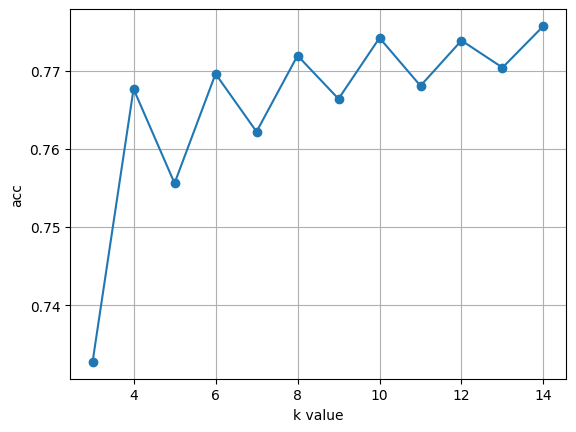

In [30]:
plt.plot(n,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('acc')
plt.grid()
plt.show()

In [31]:
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'euclidean')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [32]:
accuracy_score(y_test,y_pred)

0.7664

In [33]:
confusion_matrix(y_test,y_pred)

array([[11045,   608],
       [ 2896,   451]])

SVM

In [34]:
from sklearn.svm import SVC
sv = SVC()

In [35]:
sv.fit(x_train,y_train)

SVC()

In [36]:
y_pred = sv.predict(x_test)

In [37]:
accuracy_score(y_test,y_pred)

0.7768666666666667

GradientBoost

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators = 100,max_depth = 3, random_state = 42)
gb_clf.fit(x_train,y_train)
y_pred_gb = gb_clf.predict(x_test)
accuracy_score(y_test,y_pred_gb)

0.8208

Adaboost

In [39]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators = 100)
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [40]:
y_pred_ada = ada_clf.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred_ada)

0.8179333333333333

XGBoost

In [42]:
import xgboost as xgb

In [43]:
xgb_clf = xgb.XGBClassifier()

In [44]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
y_pred_xgb = xgb_clf.predict(x_test)

In [46]:
accuracy_score(y_test,y_pred_xgb)

0.811

Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
from sklearn.model_selection import cross_val_score, KFold
model = LogisticRegression()
kf = KFold(n_splits = 10)

In [49]:
for train_index, test_index in kf.split(x,y):
  print('Training index:', train_index)
  print('Test index:', test_index)

Training index: [ 3000  3001  3002 ... 29997 29998 29999]
Test index: [   0    1    2 ... 2997 2998 2999]
Training index: [    0     1     2 ... 29997 29998 29999]
Test index: [3000 3001 3002 ... 5997 5998 5999]
Training index: [    0     1     2 ... 29997 29998 29999]
Test index: [6000 6001 6002 ... 8997 8998 8999]
Training index: [    0     1     2 ... 29997 29998 29999]
Test index: [ 9000  9001  9002 ... 11997 11998 11999]
Training index: [    0     1     2 ... 29997 29998 29999]
Test index: [12000 12001 12002 ... 14997 14998 14999]
Training index: [    0     1     2 ... 29997 29998 29999]
Test index: [15000 15001 15002 ... 17997 17998 17999]
Training index: [    0     1     2 ... 29997 29998 29999]
Test index: [18000 18001 18002 ... 20997 20998 20999]
Training index: [    0     1     2 ... 29997 29998 29999]
Test index: [21000 21001 21002 ... 23997 23998 23999]
Training index: [    0     1     2 ... 29997 29998 29999]
Test index: [24000 24001 24002 ... 26997 26998 26999]
Training i

In [50]:
score = cross_val_score(model, x,y, cv = kf)
print('Cross validation scores are {}'.format(score))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross validation scores are [0.77766667 0.78666667 0.76466667 0.776      0.772      0.742
 0.78666667 0.80833333 0.79866667 0.779     ]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


HYPERPARAMETER TUNING

In [51]:
from sklearn import tree
max_depth = [1,2,3,]

for val in max_depth:
  score = cross_val_score(tree.DecisionTreeClassifier(max_depth = val),x,y,cv = kf, scoring='accuracy')
  print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(1): 0.820
Average score(2): 0.819
Average score(3): 0.820


GRID SEARCH

In [52]:
parameters = {'max_depth':[10,20,30,],
              'criterion':['gini','entropy'],
              'n_estimators':[50,100,200,]}

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
from sklearn.ensemble import RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(),
                           parameters,
                           cv = 5,
                           scoring='accuracy',n_jobs = -1)

In [55]:
grid_result=grid_search.fit(x_train,y_train)

In [56]:
print('Best Paameters:', grid_result.best_params_)
print('Best Score:', grid_result.best_score_)

Best Paameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}
Best Score: 0.82


RandomizedSearch

In [57]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = RandomForestClassifier(),param_distributions = parameters,
                                   verbose = 1, n_jobs = -1,
                                   n_iter=50)
random_result = random_search.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [58]:
print('Best parameters:',random_result.best_params_)
print('Best Score:',random_result.best_score_)

Best parameters: {'n_estimators': 200, 'max_depth': 10, 'criterion': 'entropy'}
Best Score: 0.8189333333333334
